In [44]:
import pandas as pd
from sktime.utils.plotting import plot_series
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
os.getcwd()

In [45]:
df = pd.read_csv('BUNDESBANK-BBK01_WT5511.csv', index_col=0)

df.head()

,Value
Date,
30-04-1968,39.10
31-05-1968,42.00
30-06-1968,40.95
31-07-1968,38.90
31-08-1968,39.85


In [46]:
y = df['Value']
y_train = y[:-6]
y_test = y[-6:]

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5685.919, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5681.456, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5680.751, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5685.643, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5682.083, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5681.760, Time=0.42 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5683.409, Time=0.63 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5680.967, Time=0.12 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 3.508 seconds


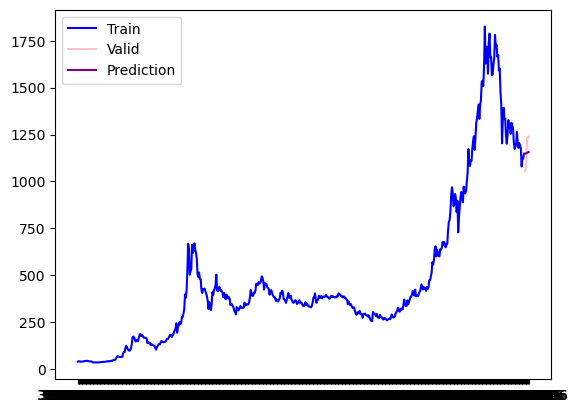

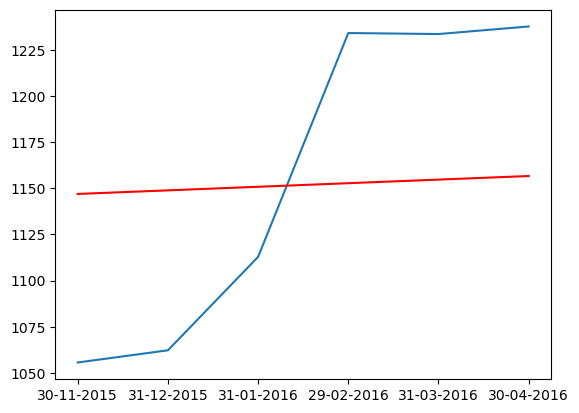

Test RMSE: 78.204


In [47]:
from numpy import sqrt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

model = auto_arima(y_train, trace=True,
                   error_action='ignore', 
                   suppress_warnings=True)

forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()


# plot results
plt.plot(y_test)
plt.plot(forecast, color='red')
plt.show()

rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=3.19 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5685.919, Time=0.11 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5682.975, Time=0.28 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5682.375, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5685.643, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=5680.751, Time=0.27 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=5682.347, Time=0.64 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=5683.125, Time=1.09 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=5682.083, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=5681.760, Time=0.45 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=5681.456, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=5683.409, Time=0.63 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=5680.967, Time=0.12 sec

Best model:  ARIMA(0,1,1)(0,0,0)[12] intercept
Total fit time: 8.038 seconds


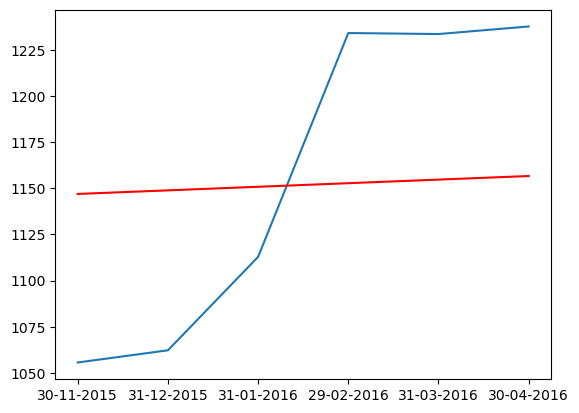

Test RMSE: 78.204


In [48]:
### SARMIA
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True,seasonal=True,m=12)

forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])


# plot results
plt.plot(y_test)
plt.plot(forecast, color='red')
plt.show()

rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

AutoETS

In [49]:
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_squared_error
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [50]:
df = pd.read_csv('BUNDESBANK-BBK01_WT5511.csv', index_col=0)

df.head()
idx = pd.to_datetime(df.index).to_period('M')
df.index=idx
y =df['Value']

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

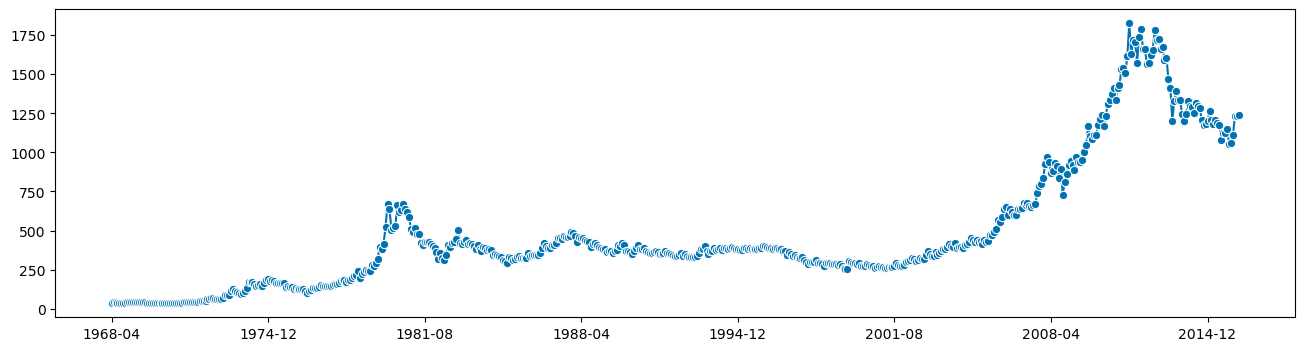

In [51]:
plot_series(df)

In [52]:
y_train, y_test = temporal_train_test_split(y,test_size=6)
print(y_train.shape, y_test.shape)

(571,) (6,)


(<Figure size 1600x400 with 1 Axes>, <Axes: >)

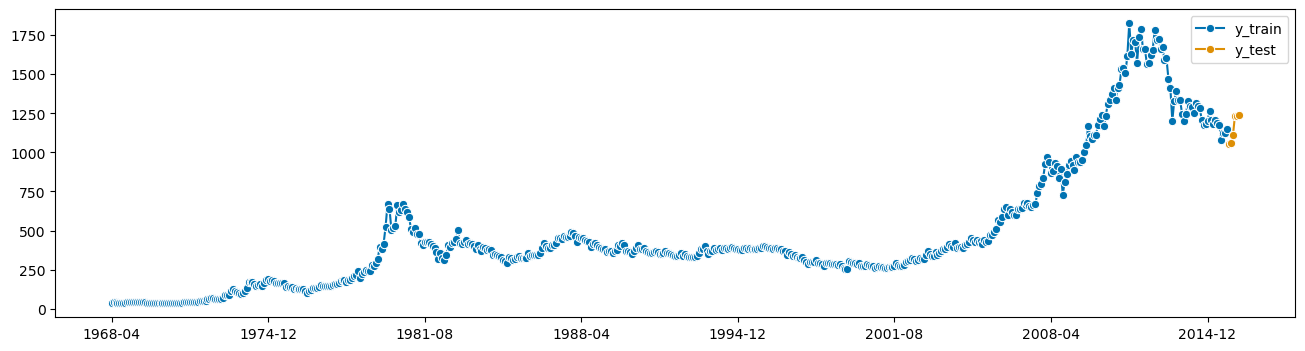

In [53]:
plot_series(y_train, y_test, labels=['y_train', 'y_test'])

In [54]:
fh = ForecastingHorizon(y_test.index, is_relative=False)
fh

ForecastingHorizon(['2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04'], dtype='period[M]', is_relative=False)

In [55]:
forecaster = AutoETS(auto=True, sp=12)
forecaster.fit(y_train)
print(forecaster.summary())

                                 ETS Results                                  
Dep. Variable:                      y   No. Observations:                  571
Model:                       ETS(MAN)   Log Likelihood               -2495.091
Date:                Fri, 17 Nov 2023   AIC                           5000.182
Time:                        09:46:05   BIC                           5021.919
Sample:                    04-30-1968   HQIC                          5008.662
                         - 10-31-2015   Scale                            0.003
Covariance Type:               approx                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9999      0.044     22.496      0.000       0.913       1.087
smoothing_trend     0.0492      0.019      2.538      0.011       0.011       0.087
initial_level      38.7965      

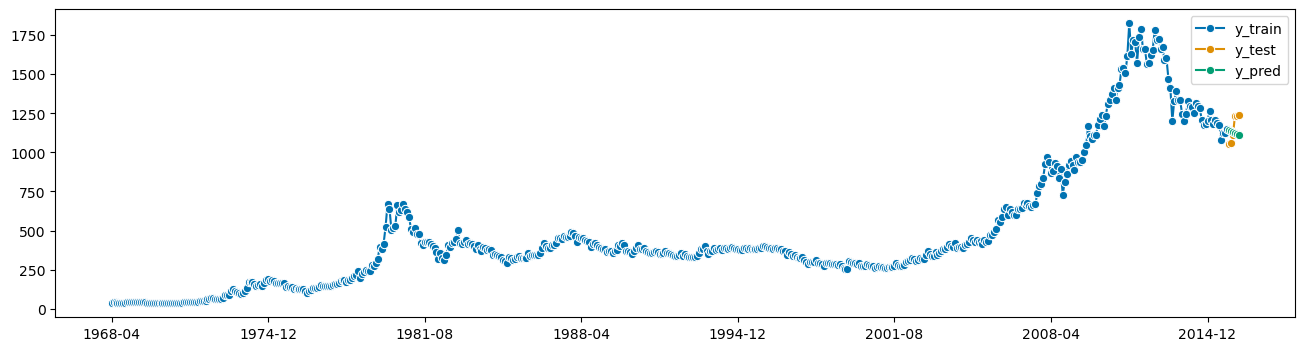

In [56]:
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])
plt.show()

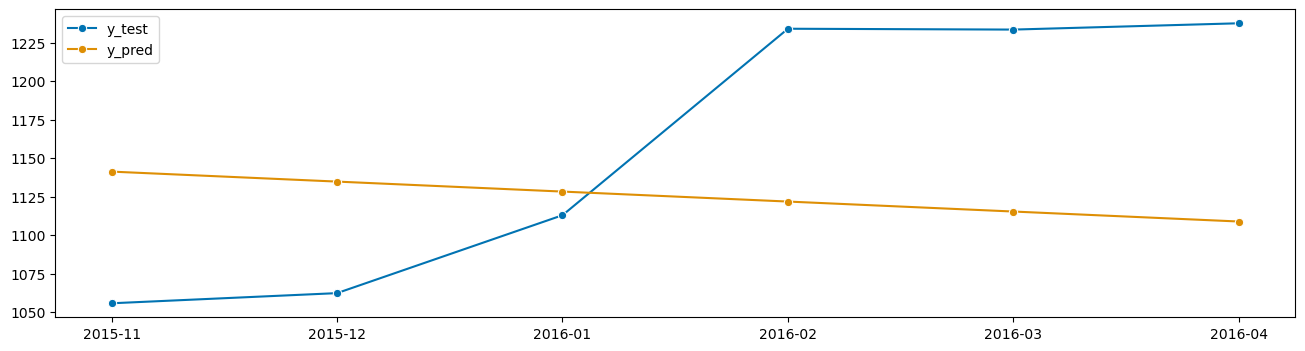

In [57]:
plot_series(y_test, y_pred, labels=['y_test', 'y_pred'])
plt.show()

In [58]:
from sktime.performance_metrics.forecasting import mean_squared_error
mean_squared_error(y_test, y_pred,square_root=True)

96.65908647446109

ExponentialSmoothing

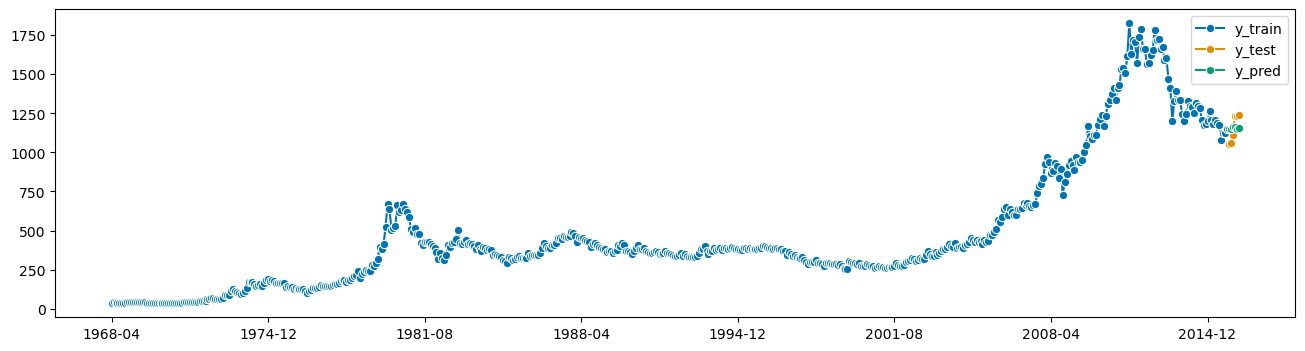

In [59]:
forecaster = ExponentialSmoothing(trend='add', seasonal='additive', sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])
plt.show()

In [60]:
from sktime.performance_metrics.forecasting import mean_squared_error
mean_squared_error(y_test, y_pred,square_root=True)

79.60028170191008